# (연습) 정규 분포

**기본 설정**

Numpy와 Pandas 라이브러리를 각각 np와 pd로 불러온다.

In [1]:
import numpy as np
import pandas as pd

데이터프레임의 [chained indexing을 금지시키기 위한 설정](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy)을 지정한다.
Pandas 3.0 버전부터는 기본 옵션으로 지정된다.

In [2]:
pd.options.mode.copy_on_write = True

주피터 노트북에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.
아래 코드는 주피터 노트북에서만 사용하며 일반적인 파이썬 코드가 아니다.

In [3]:
%precision 6

'%.6f'

아래 코드는 데이터프레임 내에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.

In [4]:
pd.set_option('display.precision', 6)

데이터 시각화를 위해 `matplotlib.pyplot`를 `plt`라는 별칭으로 불러온다.

In [5]:
import matplotlib.pyplot as plt

**데이터 저장소 디렉토리**

코드에 사용되는 [데이터 저장소의 기본 디렉토리](https://github.com/codingalzi/DataSci/tree/master/data)를 지정한다.

In [6]:
data_url = 'https://raw.githubusercontent.com/codingalzi/DataSci/refs/heads/master/data/'

### 예제: 피어슨  데이터셋

아래 코드는 피어슨<font size='2'>Karl Pearson</font>이 1903년에 실험을 위해 수집한
아버지와 아들의 키로 구성된 데이터셋을 불러온다.
원래 인치 단위를 사용하지만 편의를 위해 센티미터 단위로 변환되었다.

In [7]:
pearson = pd.read_csv(data_url+"pearson_dataset.csv", header=0)

처음 다섯 가족의 아버지 키와 아들 키 데이터는 다음과 같다.

In [8]:
pearson.head()

,Father,Son
0,165.1,151.9
1,160.8,160.5
2,165.1,160.8
3,167.1,159.5
4,155.2,163.3


아버지 키와 아들 키 각각 총 1,078개의 부동소수점 값이 포함되었다.

In [9]:
pearson.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Father  1078 non-null   float64
 1   Son     1078 non-null   float64
dtypes: float64(2)
memory usage: 17.0 KB


**문제 1**

아버지 키의 분포를 확인하기 위해 밀도 히스토그램과 
커널 밀도 추정(KDE) 기법으로 찾아진 확률 밀도 함수의 그래프를 함께 그린다.

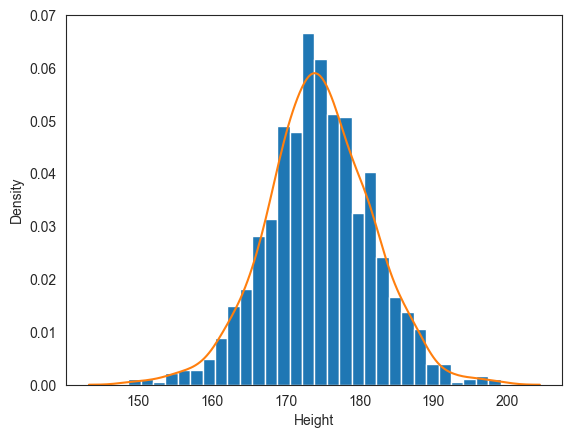

In [22]:
fig, ax = plt.subplots()

# 아들 키 밀도 히스토그램
pearson['Son'].plot.hist(ax=ax, bins=30, density=True, legend=False)

# KDE 기법으로 계산된 확률 밀도 함수 그래프
kde = sns.kdeplot(ax=ax, data=pearson['Son'])

ax.set_xlabel('Height')
ax.set_ylabel('Density')

plt.show()

그래프를 보면 평균값을 중심으로 거의 좌우 대칭을 이루는 분포를 따른다.
즉, 아들 키가 정규 분포를 따르는 것처럼 보인다.
이를 확인하기 위해 먼저 평균값과 분산을 계산한다.

In [23]:
desc_son = pearson['Son'].describe()
desc_son

count    1078.000000
mean      174.457978
std         7.153552
min       148.600000
25%       169.900000
50%       174.200000
75%       179.100000
max       199.100000
Name: Son, dtype: float64

- 아들 키 평균값

In [24]:
mu_son = desc_son.loc['mean']
mu_son

174.457978

- 아들 키 표준편차

In [25]:
sigma_son = desc_son.loc['std']
sigma_son

7.153552

**정규 분포 확인**

아래 코드는 `mu_son`와 `sigma_son`을 각각 평균값과 표준편차로 갖는 정규 분포의 확률 밀도 함수 그래프와
앞서 KDE 기법으로 계산된 확률 밀도 함수 그래프가 거의 동일함을 보여준다.

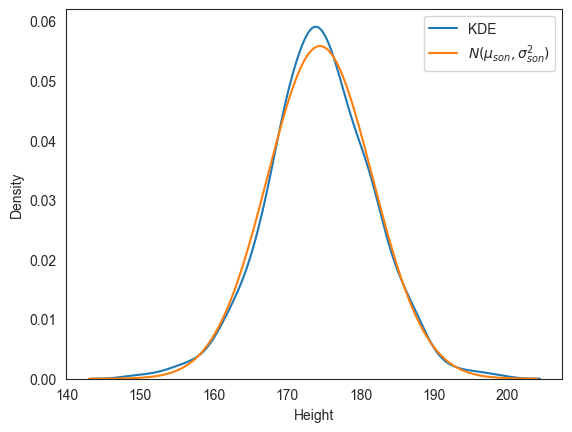

In [26]:
fig, ax = plt.subplots()

# 20대 남성 키 데이터에 대해 KDE 기법으로 추정된 확률 밀도 함수 그래프
kde = sns.kdeplot(ax=ax, data=pearson['Son'], label='KDE')

# mu_son와 sigma_son를 이용한 정규 분포의 확률 밀도 함수 그래프
x = np.arange(143, 204, 0.01)
f = lambda y: f_gaussian(y, mu_son, sigma_son)
plt.plot(x, f(x), label=r'$N(\mu_{son}, \sigma_{son}^2)$')

ax.set_xlabel('Height')
ax.set_ylabel('Density')

ax.legend()

plt.show()

주의사항: 표준편차가 7.15 정도로 1보다 많이 크기에 정규 분포에 비해 보다 펑퍼짐한 봉우리로
그려져야 하지만 표준 정규 분포에 가깝도록 보인다.
하지만 이는 y-축이 0에서 0.4가 아닌 0에서 0.06 사이로 설정되었기에
일종의 착시현상이 발생하기 때문이다.

**정규 분포 활용**

결론적으로 아들 키를 가리키는 확률 변수 $X$는
다음 정규 분포를 따른다라고 봐도 무방하다.

$$
X_{son} \sim N(\mu_{son}, \sigma_{son}^2)
$$

이를 다음과 같이 `norm` 객체를 이용하여 직접 확률 변수로 선언한다.
`norm` 객체를 활용할 때 함수처럼 평균값과 표준편차를 지정할 수 있음에 주의한다.

In [28]:
X_son = norm(loc=mu_son, scale=sigma_son)

이렇게 정의된 확률 변수의 확률 밀도 함수(pdf)와 누적 분포 함수(cdf) 등은 추가 인자 없이 바로 활용된다.
예를 들어 아래 코드는 임의로 선택된 20대 남성의 키가 평균값 이하일 확률이 50%임을 확인해준다.

In [29]:
X_son.cdf(mu_son)

0.500000

아래 코드는 우연히 선택된 아들 키가 180 이상일 확률 $P(X \geq 180)$를 
정규 분포의 확률 밀도 함수의 그래프와 x-축 사이의 특정 구간의 영역으로 보여준다.

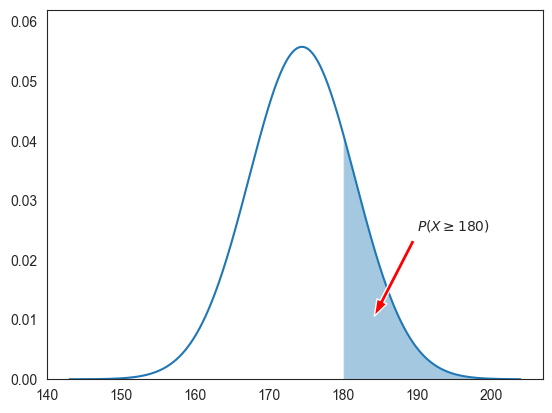

In [69]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

x = np.arange(143, 204, 0.01)
f = X_son.pdf
plt.plot(x, f(x))
plt.fill_between(x, f(x), where=(x >= 180), alpha=0.4)

ax.annotate(r'$P(X \geq 180)$', xy=(184 ,0.01), xytext=(190, 0.025),
            arrowprops=dict(facecolor='red', shrink=0.04, width=3, headwidth=8))

# ax.plot([173.5, 173.5], [0, f(173.5)], color ='black', linewidth=1.4, linestyle="--")

ax.set_ylim(0, 0.062)

plt.show()

우연히 선택된 아들 키가 180 이상일 확률 $P(X \geq 180)$의 계산은 `X_xon.cdf()` 함수를 이용한다.

In [32]:
1 - X_son.cdf(180)

0.219252

아래 코드는 데이터셋에서 아들 키가 180 이상인 샘플의 비율을 이용하여
아들 키가 180 이상일 확률을 직접 계산한다.

In [160]:
# 180 이상인 경우만 True
mask_180 = pearson['Son'] >= 180

# 전체 데이터셋에서 True인 샘플의 비율
mask_180.sum()/len(pearson)

0.221707

결론: 실제 값과 정규 분포의 누적 분포 함수를 이용하여 계산된 값이 매우 유사하다.
따라서 앞으로는 실제 값을 구하는 대신 정규 분포의 성질과 기능만을 활용하여
확률을 계산한다.

**$P(180<X<185)$ 계산**

아래 코드는 우연히 만난 한국 남성이 키 180 이상, 185 이하일 확률 $P(180<X<185)$를 그래프로 보여준다.

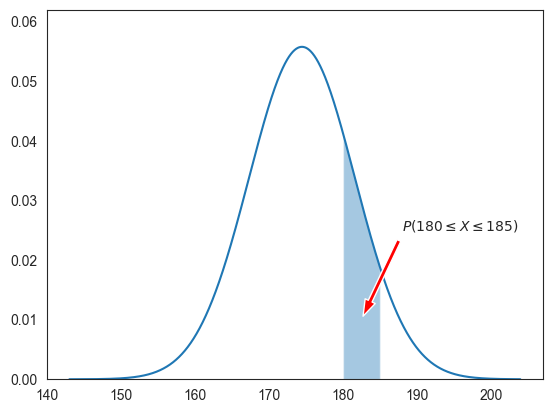

In [67]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

x = np.arange(143, 204, 0.01)
f = X_son.pdf

plt.plot(x, f(x))
plt.fill_between(x, f(x), where=(x >= 180) & (x <= 185), alpha=0.4)

# ax.annotate(r'$\mu_{son}$', xy=(mu_son+.5 ,0.002))
ax.annotate(r'$P(180 \leq X \leq 185)$', xy=(182.5 ,0.01), xytext=(188, 0.025),
            arrowprops=dict(facecolor='red', shrink=0.04, width=3, headwidth=8))

# ax.plot([mu_son, mu_son], [0, f(mu_son)], color ='black', linewidth=1.4, linestyle="--")

ax.set_ylim(0, 0.062)

plt.show()

한국 남성의 키를 가리키는 확률 변수 $X$가 정규 분포 $N(173.5, (5.17)^2)$ 을 따를 때
키 180 이상, 185 이하의 남성을 소개팅에서 만날 확률 $P(180 \leq X \leq 185)$는 다음과 같이 계산된다.

In [17]:
F_gaussian(185, 173.5, 5.17) - F_gaussian(180, 173.5, 5.17)

0.091269

## 확률 변수 표준화

$X \sim N(\mu, \sigma^2)$이 성립한다고 가정했을 때
$X$의 표준 점수는 다음과 같이 정의된다.

$$
Z = \frac{X-\mu}{\sigma}
$$

그러면 확률 변수 $Z$는 이제 표준 정규 분포를 따른다.

$$
Z \sim N(0,1)
$$

예를 들어 아들 키 180과 185의 표준 점수는 다음과 같다.

- 180의 표준점수: 

In [73]:
z_180 = (180 - mu_son)/sigma_son
z_180

0.774723

- 185의 표준점수

In [74]:
z_185 = (185 - mu_son)/sigma_son
z_185

1.473677

**표준화 이전과 이후의 확률**

표준화 이후에는 평균값과 표준편차만 다른 정규 분포를 따른다.
하지만 확률은 달라지지 않는다.

- (키 180 이상일 확률) = (표준 점수가 0.774723 이상일 확률)

In [81]:
(1 - X_son.cdf(180)) == (1 - F_gaussian(z_180))

True

- 키 180 이상, 185 이하일 확률 = 표준 점수가  0.774723 이상, 1.473677 이하일 확률

In [83]:
(X_son.cdf(185) - X_son.cdf(180)) == (F_gaussian(z_185) - F_gaussian(z_180))

True

**문제 1**